In [ ]:
from google.colab import files


uploaded = files.upload()


Saving spam1.csv to spam1 (2).csv


In [ ]:
import numpy as np
import pandas as pd
import io

In [ ]:
df=pd.read_csv(io.BytesIO(uploaded['spam1.csv']),encoding =  'ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df = df[::10]

In [ ]:
df.shape

(558, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 5570
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          558 non-null    object
 1   v2          558 non-null    object
 2   Unnamed: 2  7 non-null      object
 3   Unnamed: 3  1 non-null      object
 4   Unnamed: 4  0 non-null      object
dtypes: object(5)
memory usage: 21.9+ KB


In [ ]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
10,0,I'm gonna be home soon and i don't want to tal...
20,0,Is that seriously how you spell his name?
30,0,"Wait that's still not all that clear, were you..."
40,0,Pls go ahead with watts. I just wanted to be s...


In [ ]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
df.duplicated().sum()

5

In [ ]:
df=df.drop_duplicates(keep='first')

In [ ]:
df.shape

(553, 2)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

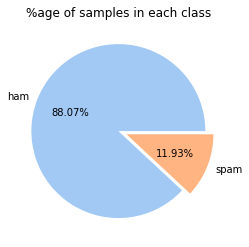

In [ ]:
plt.title('%age of samples in each class')
plt.pie(df['target'].value_counts(),labels=['ham','spam'],colors=sns.color_palette('pastel'),explode=[0,0.1],autopct='%.2f%%')
plt.show()

In [ ]:
df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
10,0,I'm gonna be home soon and i don't want to tal...,109
20,0,Is that seriously how you spell his name?,41
30,0,"Wait that's still not all that clear, were you...",130
40,0,Pls go ahead with watts. I just wanted to be s...,82


In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

def tokenize(x):
    doc=nlp(x)
    return len(doc)

In [ ]:
df['num_words']=df['text'].apply(tokenize)

In [ ]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
10,0,I'm gonna be home soon and i don't want to tal...,109,28
20,0,Is that seriously how you spell his name?,41,9
30,0,"Wait that's still not all that clear, were you...",130,30
40,0,Pls go ahead with watts. I just wanted to be s...,82,20


In [ ]:
df['num_sents'] = df['text'].apply(lambda x: len(list(nlp(x).sents)))
df.head()

,target,text,num_characters,num_words,num_sents
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
10,0,I'm gonna be home soon and i don't want to tal...,109,28,2
20,0,Is that seriously how you spell his name?,41,9,1
30,0,"Wait that's still not all that clear, were you...",130,30,1
40,0,Pls go ahead with watts. I just wanted to be s...,82,20,4


In [ ]:
df.describe()

,target,num_characters,num_words,num_sents
count,553.000000,553.000000,553.000000,553.000000
mean,0.119349,77.528029,17.942134,2.066908
std,0.324492,57.534580,12.918372,1.490626
min,0.000000,3.000000,1.000000,1.000000
25%,0.000000,35.000000,9.000000,1.000000
50%,0.000000,56.000000,14.000000,2.000000
75%,0.000000,115.000000,26.000000,3.000000
max,1.000000,444.000000,102.000000,14.000000


In [ ]:
df.groupby('target').agg([np.mean,np.std,len,np.min,np.max])

num_characters                            num_words                  \
                 mean        std  len amin amax       mean        std  len   
target                                                                       
0           70.273101  56.121720  487    3  444  16.763860  12.971149  487   
1          131.060606  35.463038   66   13  168  26.636364   8.490060   66   

                 num_sents                           
       amin amax      mean       std  len amin amax  
target                                               
0         1  102  1.903491  1.408721  487    1   14  
1         2   49  3.272727  1.534681   66    1    7

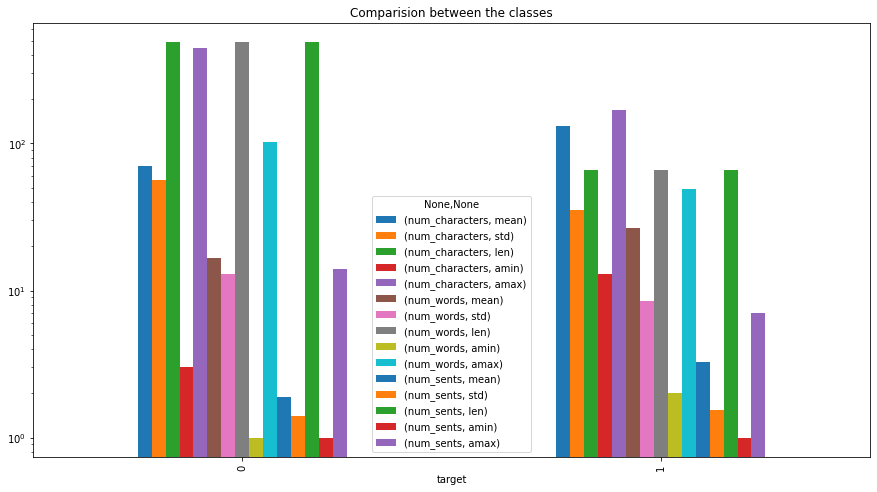

In [ ]:
view=df.groupby('target').agg([np.mean,np.std,len,np.min,np.max])
view.plot(kind='bar',figsize=(15,8),title='Comparision between the classes',logy=True)

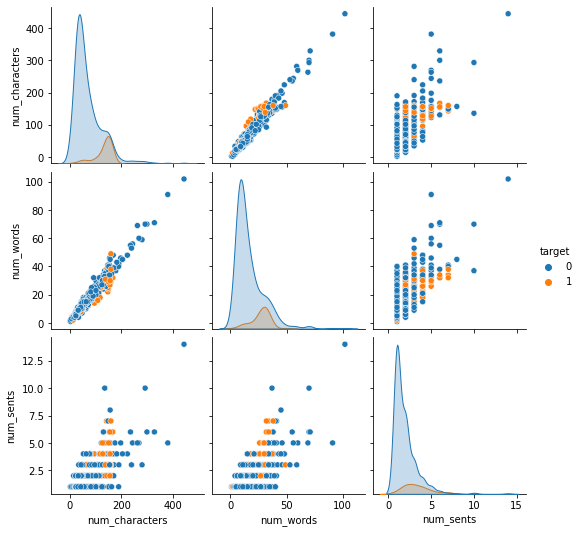

In [ ]:
sns.pairplot(df,hue='target')

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS
import string
def transform_text(text):
    text = text.lower()
    text = [word.text for word in nlp(text)]
    y=[]
    for i in text:
        if i.isalnum() and (i not in STOP_WORDS) and (i not in string.punctuation):
            y.append(i)
    
    text=y[:]
    y.clear()
    for i in text:
        for j in nlp(i):
            y.append(j.lemma_)
    return " ".join(y)

In [ ]:
df['transformed_text']=df['text'].apply(transform_text)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sents,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,jurong point crazy available bugis n great wor...
10,0,I'm gonna be home soon and i don't want to tal...,109,28,2,gon na home soon want talk stuff anymore tonig...
20,0,Is that seriously how you spell his name?,41,9,1,seriously spell
30,0,"Wait that's still not all that clear, were you...",130,30,1,wait clear sure sarcastic x want live
40,0,Pls go ahead with watts. I just wanted to be s...,82,20,4,pls ahead watt want sure great weekend abiola


In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
spam_corpus= []
for msg in df[df['target']== 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


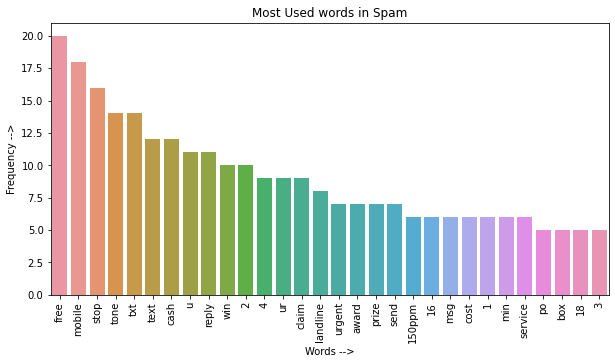

In [ ]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(10,5))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.xlabel("Words -->")
plt.ylabel("Frequency -->")
plt.title("Most Used words in Spam")

plt.show()

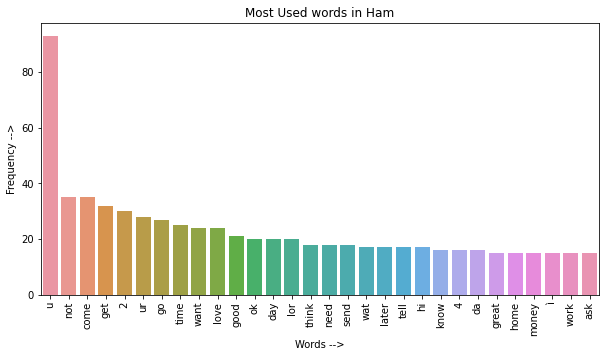

In [ ]:
ham_corpus= []
for msg in df[df['target']== 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
plt.figure(figsize=(10,5))
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.xlabel("Words -->")
plt.ylabel("Frequency -->")
plt.title("Most Used words in Ham")

plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
tf= TfidfVectorizer(max_features=3000)
X = tf.fit_transform(df['transformed_text']).toarray()

In [ ]:
X.shape

(553, 1725)

In [ ]:
y = df['target'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

              precision    recall  f1-score   support

         Ham       0.94      0.85      0.89        98
        Spam       0.35      0.62      0.44        13

    accuracy                           0.82       111
   macro avg       0.65      0.73      0.67       111
weighted avg       0.87      0.82      0.84       111



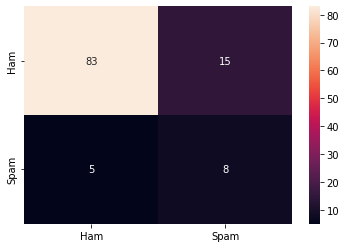

In [ ]:
from sklearn.metrics import classification_report
gnb.fit(X_train,y_train)
y_pred_gnb = gnb.predict(X_test)
print(classification_report(y_test,y_pred_gnb,target_names=['Ham','Spam']))
sns.heatmap(confusion_matrix(y_test,y_pred_gnb),annot=True,xticklabels=['Ham','Spam'],yticklabels=['Ham','Spam'])


              precision    recall  f1-score   support

         Ham       0.91      1.00      0.95        98
        Spam       1.00      0.23      0.38        13

    accuracy                           0.91       111
   macro avg       0.95      0.62      0.66       111
weighted avg       0.92      0.91      0.88       111



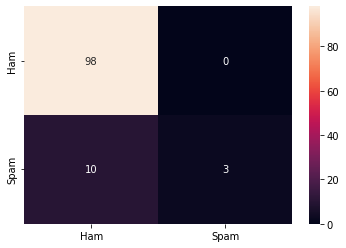

In [ ]:
mnb.fit(X_train,y_train)
y_pred_mnb = mnb.predict(X_test)
print(classification_report(y_test,y_pred_mnb,target_names=['Ham','Spam']))
sns.heatmap(confusion_matrix(y_test,y_pred_mnb),annot=True,xticklabels=['Ham','Spam'],yticklabels=['Ham','Spam'])


              precision    recall  f1-score   support

         Ham       0.91      1.00      0.95        98
        Spam       1.00      0.23      0.38        13

    accuracy                           0.91       111
   macro avg       0.95      0.62      0.66       111
weighted avg       0.92      0.91      0.88       111



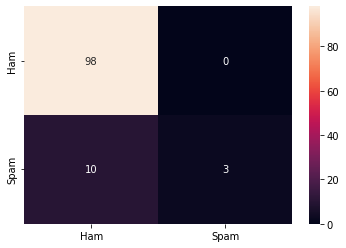

In [ ]:
bnb.fit(X_train,y_train)
y_pred_bnb = bnb.predict(X_test)
print(classification_report(y_test,y_pred_bnb,target_names=['Ham','Spam']))
sns.heatmap(confusion_matrix(y_test,y_pred_bnb),annot=True,xticklabels=['Ham','Spam'],yticklabels=['Ham','Spam'])


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=5)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9279279279279279
Precision -  1.0
For  NB
Accuracy -  0.9099099099099099
Precision -  1.0
For  DT
Accuracy -  0.9369369369369369
Precision -  0.8
For  LR
Accuracy -  0.8918918918918919
Precision -  1.0
For  RF
Accuracy -  0.9279279279279279
Precision -  1.0
For  AdaBoost
Accuracy -  0.9369369369369369
Precision -  0.875


In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
temp_df


,Algorithm,Accuracy,Precision
0,SVC,0.927928,1.000
1,NB,0.909910,1.000
3,LR,0.891892,1.000
4,RF,0.927928,1.000
5,AdaBoost,0.936937,0.875
2,DT,0.936937,0.800


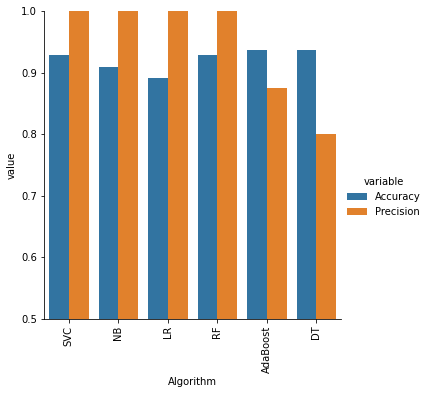

In [ ]:
performance_df1 = pd.melt(temp_df, id_vars = "Algorithm")
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
mnb = MultinomialNB()
bnb= BernoulliNB()
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('mnb',mnb),('bnb',bnb)],voting='soft')
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('mnb', MultinomialNB()), ('bnb', BernoulliNB())],
                 voting='soft')

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9099099099099099
Precision 1.0


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        98
           1       1.00      0.23      0.38        13

    accuracy                           0.91       111
   macro avg       0.95      0.62      0.66       111
weighted avg       0.92      0.91      0.88       111

